In [132]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math




In [17]:
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

In [14]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print('Shape of training data' + str(train.shape))
print('Shape of testing data' + str(test.shape))

Shape of training data(1460, 81)
Shape of testing data(1459, 80)


In [20]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [27]:

train.SalePrice.skew()

1.8828757597682129

Skew is: 0.12133506220520406


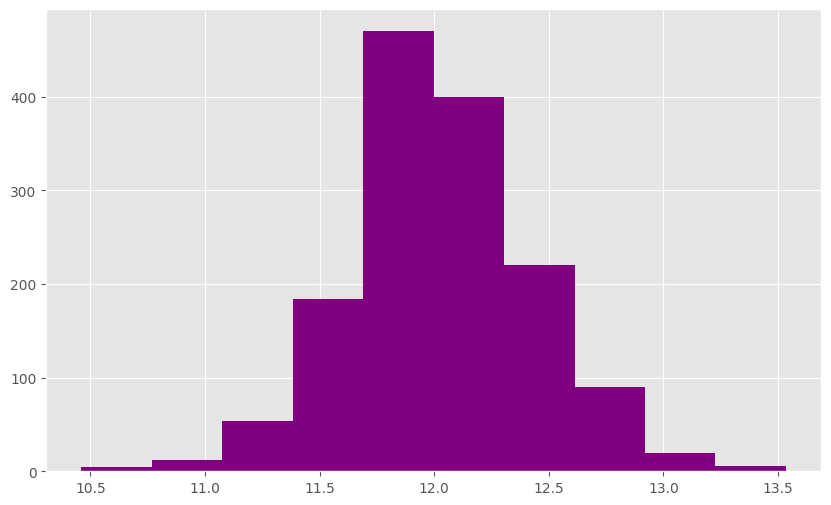

In [30]:
target = np.log(train.SalePrice)
print("Skew is:", target.skew())
plt.hist(target, color='purple')
plt.show()


In [44]:
numeric_features = train.select_dtypes(include=[np.number])
corr = numeric_features.corr()
print(corr['SalePrice'].sort_values(ascending=False)[:10], '\n')
print(corr['SalePrice'].sort_values(ascending=False)[-5:])


SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64 

YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


In [45]:
train.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

In [51]:
quality_pivot = train.pivot_table(values='SalePrice', index='OverallQual', aggfunc=np.median)

In [52]:
quality_pivot

,SalePrice
OverallQual,
1,50150
2,60000
3,86250
4,108000
5,133000
6,160000
7,200141
8,269750
9,345000


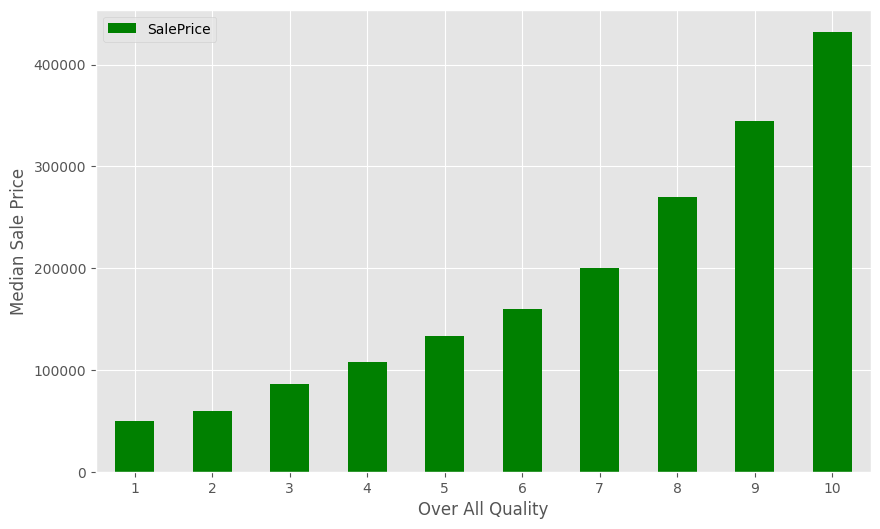

In [53]:
quality_pivot.plot(kind='bar', color='green')
plt.xlabel('Over All Quality')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

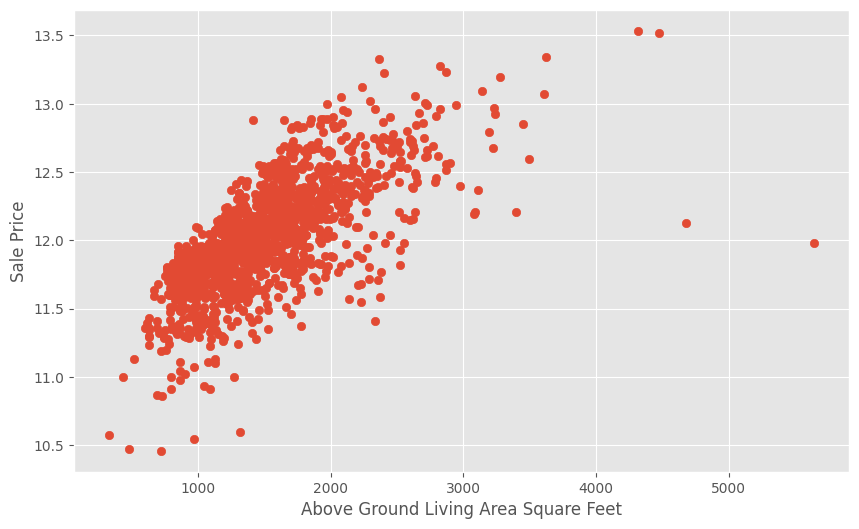

In [56]:
plt.scatter(x=train['GrLivArea'], y=target)
plt.xlabel('Above Ground Living Area Square Feet')
plt.ylabel('Sale Price')
plt.show()

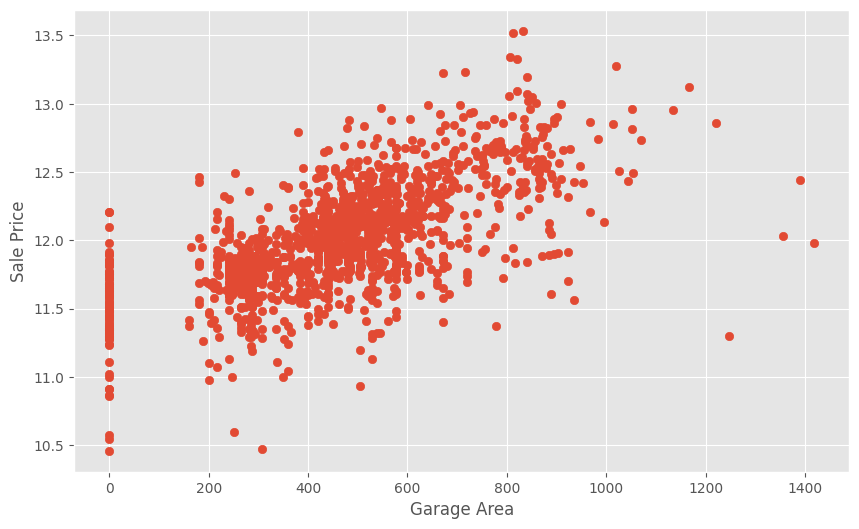

In [57]:
plt.scatter(x=train['GarageArea'], y=target)
plt.xlabel('Garage Area')
plt.ylabel('Sale Price')
plt.show()

In [60]:
train = train[train['GarageArea'] < 1200]


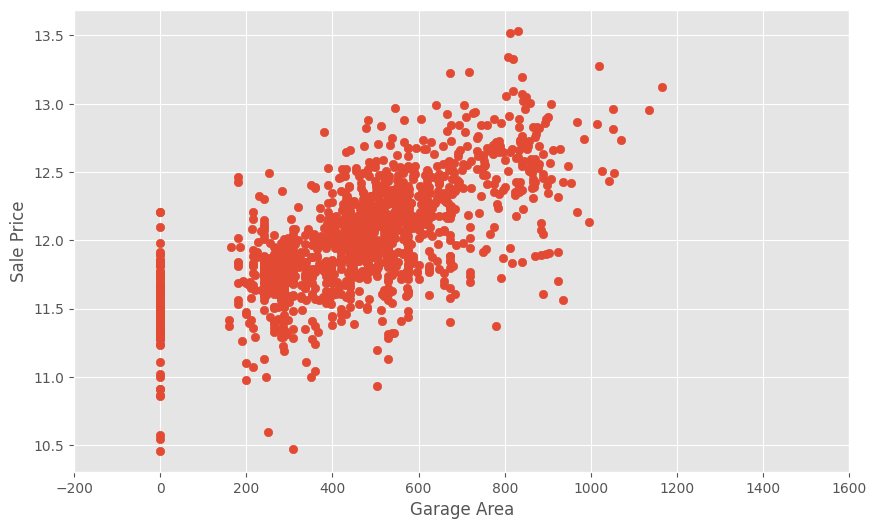

In [61]:
plt.scatter(x=train['GarageArea'], y=np.log(train.SalePrice))
plt.xlim(-200, 1600)
plt.xlabel('Garage Area')
plt.ylabel('Sale Price')
plt.show()

In [85]:
nulls = pd.DataFrame(train.isna().sum().sort_values(ascending=False)[:30])
nulls.columns = ['Nulls Count']
nulls.index.name = 'Feature'
nulls[nulls['Nulls Count'] != 0]

,Nulls Count
Feature,
PoolQC,1449
MiscFeature,1402
Alley,1364
Fence,1174
FireplaceQu,689
LotFrontage,258
GarageYrBlt,81
GarageCond,81
GarageType,81


In [78]:
train['MiscFeature'].value_counts(dropna=False)

NaN     1402
Shed      48
Gar2       2
Othr       2
TenC       1
Name: MiscFeature, dtype: int64

In [80]:
categoricals = train.select_dtypes(exclude=np.number)
categoricals.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1455,1455,91,1455,1455,1455,1455,1455,1455,1455,...,1374,1374,1374,1374,1455,6,281,53,1455,1455
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
freq,1147,1450,50,921,1309,1454,1048,1378,225,1257,...,867,605,1306,1321,1335,2,157,48,1266,1196


In [87]:
train.Street.value_counts()

Pave    1450
Grvl       5
Name: Street, dtype: int64

In [92]:
train['enc_street'] = pd.get_dummies(train.Street, drop_first=True)
test['enc_street'] = pd.get_dummies(test.Street, drop_first=True)

In [94]:
train.enc_street.value_counts()

1    1450
0       5
Name: enc_street, dtype: int64

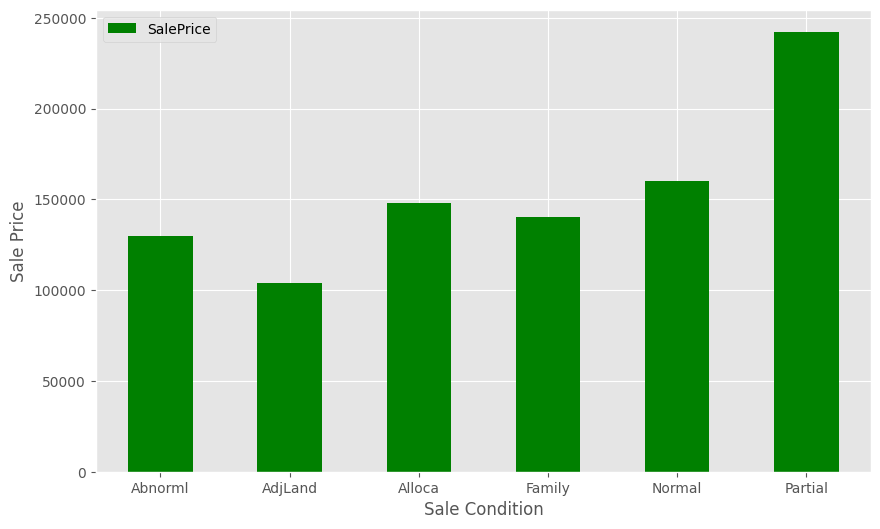

In [103]:
condition_pivot = train.pivot_table(values='SalePrice', index='SaleCondition', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='green')
plt.ylabel('Sale Price')
plt.xlabel('Sale Condition')
plt.xticks(rotation=0)
plt.show()

In [106]:
def encode(x):
    return 1 if x == 'Partial' else 0

train['enc_sale_condition'] = train.SaleCondition.apply(encode)
test['enc_sale_condition'] = test.SaleCondition.apply(encode)

In [108]:
train.enc_sale_condition.value_counts()

0    1333
1     122
Name: enc_sale_condition, dtype: int64

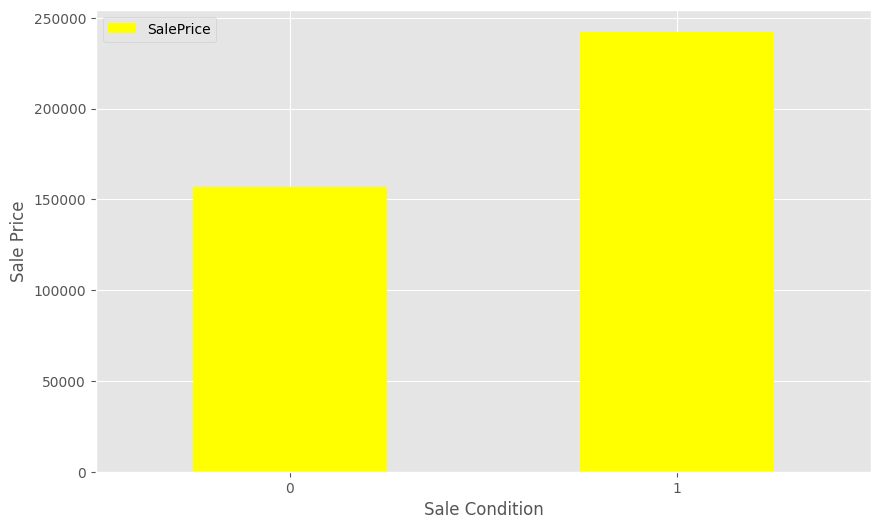

In [110]:
condition_pivot = train.pivot_table(values='SalePrice', index='enc_sale_condition', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='yellow')
plt.ylabel('Sale Price')
plt.xlabel('Sale Condition')
plt.xticks(rotation=0)
plt.show()

In [111]:
data = train.select_dtypes(include=[np.number]).interpolate().dropna()

In [113]:
sum(data.isna().sum() != 0)

0

In [120]:
y = np.log(train.SalePrice)
X = data.drop(['SalePrice', 'Id'], axis=1)

In [121]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=42, test_size=0.33)

In [127]:
from sklearn import linear_model
lr = linear_model.LinearRegression()

In [128]:
model = lr.fit(X_train, y_train)

In [130]:
model.score(X_valid, y_valid)

0.8882477709262497

In [131]:
predictions = model.predict(X_valid)

In [133]:
mean_squared_error(y_valid, predictions)

0.017841794519568466

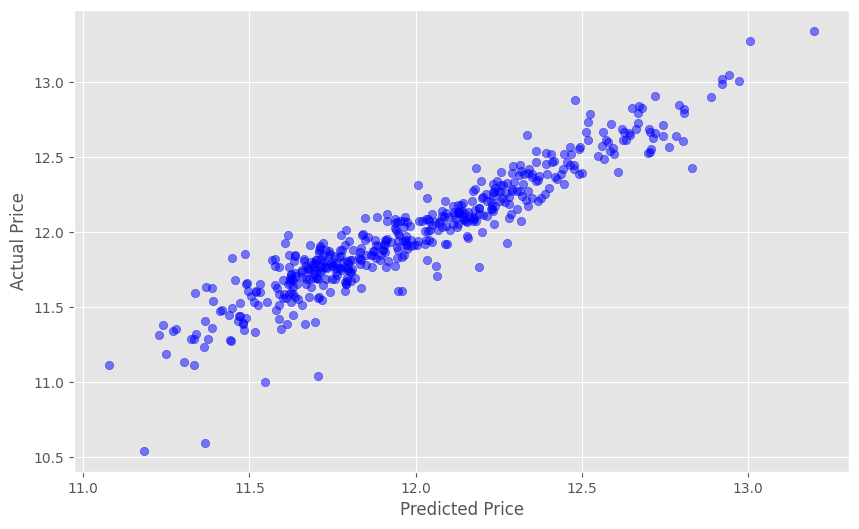

In [135]:
actual_values = y_valid
plt.scatter(predictions, actual_values, alpha=0.5, color='b' )
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.show()